# Check convergence of messages
For each message $\mu$ at iteration $t$, compute $\sum_x \left|\mu^{(t)}(x)-\mu^{(t-1)}(x)\right|$ and check that it goes to zero

## Infinite graph

In [1]:
using MatrixProductBP, MatrixProductBP.Models, TensorTrains
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
using LaTeXStrings;

In [2]:
T = 5         # final time
k = 3          # degree
m⁰ = 0.3       # magnetization at time zero

β = 1.0
J = 0.2
h = 0.0;

In [13]:
function CB(bp)
    cb = CB_BP(bp)
    aux = deepcopy(bp.μ)
    matrixdiff = []
    function cb_matrixconvergence(bp, it, svd_trunc)
        Δ = cb(bp, it, svd_trunc)
        diff = [norm(A)^2 + norm(B)^2 - 2*dot(A, B) for (A, B) in zip(bp.μ, aux)]
        push!(matrixdiff, diff)
        aux = deepcopy(bp.μ)
        Δ
    end
    cb, cb_matrixconvergence, matrixdiff
end

CB (generic function with 1 method)

In [14]:
wᵢ = fill(HomogeneousGlauberFactor(J, h, β), T+1)
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = mpbp_infinite_graph(k, wᵢ, 2, ϕᵢ);

In [15]:
cb, cb2, matrixdiff = CB(bp)
iters, cb2 = iterate!(bp, maxiter=20; svd_trunc = TruncBond(3), cb=cb2, tol=1e-10, damp=0.5);

Running MPBP: iter 2    Time: 0:00:00
  Δ:                0.07217688115771437


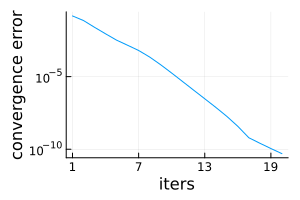

In [16]:
plot(cb.Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="", xticks=1:(length(cb.Δs)÷3):length(cb.Δs))

In [17]:
matrixdiff

20-element Vector{Any}:
 [5.355977611719699e-5]
 [6.174296009205929e-6]
 [7.975758850647593e-7]
 [1.0718649570175265e-7]
 [1.8284576416968332e-8]
 [3.345050795275188e-9]
 [5.324621356892281e-10]
 [6.508115888651661e-11]
 [6.211345457071693e-12]
 [4.971238264789291e-13]
 [3.5879719334497295e-14]
 [2.468403086097748e-15]
 [1.6620819304202783e-16]
 [1.1058862159352145e-17]
 [7.589415207398531e-19]
 [0.0]
 [3.2526065174565133e-19]
 [4.336808689942018e-19]
 [3.2526065174565133e-19]
 [-3.2526065174565133e-19]

## Finite graph

In [18]:
using MatrixProductBP, MatrixProductBP.Models
using Plots, LaTeXStrings 
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
using Graphs, IndexedGraphs

In [19]:
T = 5
k = 3
N = 10^2
g = random_regular_graph(N, k)
ising = Ising(IndexedGraph(g); J=fill(J, ne(g)), h=fill(h, N), β)
bp = mpbp(Glauber(ising, T); ϕ = fill(ϕᵢ, N));

In [20]:
cb, cb2, matrixdiff = CB(bp)
iters, cb2 = iterate!(bp, maxiter=20; svd_trunc = TruncBond(3), cb=cb2, tol=1e-10, damp=0.5);

Running MPBP: iter 2    Time: 0:00:00
  Δ:                0.04135576593534318




Running MPBP: iter 3    Time: 0:00:01
  Δ:                0.021242786568910432




Running MPBP: iter 4    Time: 0:00:01
  Δ:                0.010318759089981144




Running MPBP: iter 5    Time: 0:00:02
  Δ:                0.006667802357986696




Running MPBP: iter 6    Time: 0:00:02
  Δ:                0.0043157200983166




Running MPBP: iter 7    Time: 0:00:02
  Δ:                0.0026643585752246235




Running MPBP: iter 8    Time: 0:00:03
  Δ:                0.0015942810903497584




Running MPBP: iter 9    Time: 0:00:03
  Δ:                0.000991581334266467




Running MPBP: iter 10    Time: 0:00:04
  Δ:                0.0006359611608874882




Running MPBP: iter 11    Time: 0:00:04
  Δ:                0.0003984048649567917




Running MPBP: iter 12    Time: 0:00:04
  Δ:                0.00024555091217792757




Running MPBP: iter 13    Time: 0:00:05
  Δ:                0.00015917228212458667




Running MPBP: iter 14    Time: 0:00:05
  Δ:                0.00010142455936135164




Running MPBP: iter 15    Time: 0:00:06
  Δ:                6.549264114252829e-5




Running MPBP: iter 16    Time: 0:00:06
  Δ:                4.2562790976585774e-5




Running MPBP: iter 17    Time: 0:00:07
  Δ:                2.7295508735702967e-5




Running MPBP: iter 18    Time: 0:00:07
  Δ:                1.7297416056161197e-5




Running MPBP: iter 19    Time: 0:00:07
  Δ:                1.0844914842378373e-5




Running MPBP: iter 20    Time: 0:00:08
  Δ:                6.734196361879441e-6


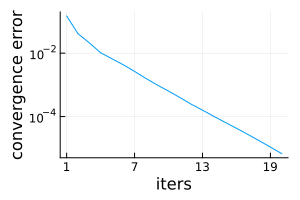

In [21]:
plot(cb.Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="", xticks=1:(length(cb.Δs)÷3):length(cb.Δs))

In [22]:
maximum.(matrixdiff)

20-element Vector{Float64}:
 1.7842146284016052e-5
 5.649770718456218e-6
 1.8680017395651194e-6
 7.060681118676573e-7
 2.8426977866460347e-7
 1.15651536285611e-7
 4.7375438106257543e-8
 1.9619834609827663e-8
 8.174271091281916e-9
 3.419402733618321e-9
 1.432163887590994e-9
 5.987527073540028e-10
 2.4915298069052433e-10
 1.0294426780205895e-10
 4.21556070216364e-11
 1.7086916191851043e-11
 6.8496894354425075e-12
 2.7144758879896203e-12
 1.063270023242413e-12
 4.116908636914163e-13